#  Head- Bilderstapel und  3D-Visualisierung
***

## Aufgabenbeschreibung

Die Ergebnisse von tomographischen Bildgebungsverfahren (z.B. Computertomographie, Magnetresonanztomographie oder Positronen-Emissionstomographie) sind Stapel von z.T. mehreren hundert Schnitt-/Schichtbildern primär in der Transversalebene.
Aus diesen *Originalbildern* können weitere Ebenen für eine Visualisierung berechnet werden. Der Bildstapel einer Ebene kann jedoch auch Basis einer 3D-Visualisierung sein.

Innerhalb dieser Aufgabe sollen zwei Ziele erreicht werden:
1. Umgang mit Bilderstapeln und deren Visualisierung sowie die Verarbeitung der einzelnen Schichtbilder als Vorbereitung einer 3D-Rekonstruktion
2. Rekonstruktion und Visualisierung eines 3D-Modells auf Basis eines (vorverarbeiteten) Bildstapels 

Den in dieser Übung zu verwendenden Bildstapel laden Sie bitte unter folgendem Link herunter: <https://mri.radiology.uiowa.edu/VHDicom/VHFCT1mm/VHF-Head.tar.gz>

Der Datensatz ist den *CT Datasets (Visible Female CT Datasets)* des *Visible Human Project* (<https://www.nlm.nih.gov/research/visible/visible_human.html>) entnommen.

### Wichtige Hinweise zur Übung

- Für die Realisierung von **Aufgabe 4** und des **Bonusteils** sind externe Bibliotheken ausdrücklich zugelassen.
- Das Notebook wird parallel wie gewohnt über Moodle abgegeben.
- Listen Sie vor jeder Aufgabe die von Ihnen ggf. verwendeten externen Bibliotheken auf.
- Sollte keine Vorstellung erfolgen, werden nur die über Moodle abgegebenen und mit den *Standard-Paketen* (siehe Foliensatz **Organisatorisches**) bzw. nachinstallierbaren Paketen (mittels `pip` oder `conda`) ausführbaren Teile Ihrer Lösung bewertet.


**Hinweis zur Bearbeitung:** 

Für die Visualisierung soll das `matplotlib`-Paket verwendet werden. Alle Bilder sollen *inline* in diesem Notebook ausgegeben werden. Ausnahmen sind bei den jeweiligen Aufgaben genannt.

**Hinweise zur Abgabe**

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matr.-Nr. aus!
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Datei `dicom_ct.dcm` muss nicht abgegeben werden.

### Viel Erfolg!

---
---

### Aufgaben:

**1. Einlesen und Visualisieren des DICOM-Bildstapels**

Lesen Sie alle DICOM-Bilder des Verzeichnisses ein.
Visualisieren Sie den Bildstapel mit Hilfe eines interaktiven **Sliders** über den durch den Bildstapel navigiert werden kann. 

**Hinweise:**
- Verwenden Sie die Ihnen bekannte Bibliothek `pydicom` zum Einlesen der DICOM-Dateien.
- Nutzen sie das Paket `ipywidgets` zur Realisierung der interaktiven Elemente.

In [1]:
# Aufgabe 1

import os
import pydicom
import ipywidgets as widgets
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt

%matplotlib inline

image_stack = []

for file_name in sorted(os.listdir('./Head/')):
    pixels = pydicom.read_file('./Head/' + file_name).pixel_array
    image_stack.append(pixels)
             
def show_image(image_stack, position):
    plt.figure(figsize = (10, 10))
    plt.imshow(image_stack[position], cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

stack_slider = widgets.IntSlider(min=0, max=len(image_stack) - 1, step=1, value=0, continuous_update=False)    

interact(show_image, image_stack=fixed(image_stack), position=stack_slider);

interactive(children=(IntSlider(value=0, continuous_update=False, description='position', max=233), Output()),…

**2. Konvertierung des DICOM-Bildstapels in Binärbilder**

Implementieren sie eine Funktion zur Konvertierung eines Bildes in das Binärformat anhand eines gegebenen Schwellenwertes.

In CT-DICOM-Bildern zeichnen sich die Bereiche des Untersuchungsobjektes über vergleichsweise hohe Signalwerte aus. In Gegensatz dazu ist der Hintergrund durch niedrige Signalwerte gekennzeichnet. Mit Hilfe der binären Konvertierung kann das Objekt vom Hintergrund getrennt werden.

Ihre Funktion soll die Pixel des Bildes anhand eines Vergleichs mit einem gegebenen Schwellenwert (Funktionsparameter) dem Hintergrund bzw. dem Objekt zuordnen:
- Pixelwert < Schwellenwert: Pixel ist Hintergrundpixel
- Pixelwert >= Schwellenwert: Pixel ist Objektpixel

Wenden Sie Ihre Funktion auf alle Bilder des Stapels an. Wählen Sie hierzu einen Schwellenwert von **250**.

Visualisieren Sie den konvertierten Bilderstapel analog zu **1.** (der Hintergrund soll in schwarz, das Objekt in weiß dargestellt werden).

In [2]:
# Aufgabe 2

threshold = 250
binary_stack = []

def to_binary(image, threshold):
    return (image >= threshold) * 1

for image in image_stack:
    binary_stack.append(to_binary(image, threshold))
    
interact(show_image, image_stack=fixed(binary_stack), position=stack_slider);

interactive(children=(IntSlider(value=0, continuous_update=False, description='position', max=233), Output()),…

**3. Optimieren der Binärbilder**

Anhand der Visualisierung in **2.** ist zu erkennen, dass die Bilder z.T. kleine Artefakte im Hintergrund bzw. *Löcher* innerhalb des Objektes aufweisen. Der Objektrand ist teilweise sehr *ausgefranst*. Auf einigen Bildern sind Bereiche des Untersuchungstisches im Bild vorhanden.

Versuchen Sie diese *ungünstigen* Eigenschaften der Bilder auszugleichen.

1. Morphologische Operationen (Erosion, Dilatation, Öffnung, Schließung) zur Glättung der Objektränder, Schließung kleinerer Löcher im Objekt oder Entfernung kleinerer Artefakte
    - Achten Sie auf die Reihenfolge der Operationen und deren Kombinationsmöglichkeiten
2. Definieren eines **globalen** Objektbereichs über ein Rechteck. Alle Pixel außerhalb dieses Objektbereiches sind automatisch Hintergrund. Wenden Sie den von Ihnen definierten Objektbereich auf alle Bilder des Stapels an.
    - Achten Sie bei der Festlegung des Objektbereichs darauf, dass keine Teile der korrekten Objekte versehentlich entfernt werden.

**Weitere Optimierungen werden als Bonus gewertet.**

Visualisieren Sie den optimierten Binärbildstapel analog zu **1.**

** Hinweise:**
- Die morphologische Operationen sind in den zugelassenen *Standard-Paketen* enthalten und dürfen verwendet werden.

In [3]:
# Aufgabe 3

import numpy as np
import itertools
from skimage.morphology import binary_closing, binary_opening
from skimage.morphology import square as sq
from skimage.morphology import disk

# ROI Parameters
x_left = 60
y_upper = 120
width = 400
height = 250

x_right = x_left + width
y_lower = y_upper + height

# Morphology
number_iterations = 1
struct_element = disk(5) #MUSS je nach DATASET angepasst werden!!!!

def apply_roi(image):
    new_image = np.zeros(image.shape)
    new_image[y_upper:y_lower,x_left:x_right] = image[y_upper:y_lower,x_left:x_right]
    return new_image

def apply_morphology(image):
    
    new_image = np.array(image, copy=True)
    
    for _ in itertools.repeat(None, number_iterations):
        new_image = binary_opening(new_image, struct_element)
        
    for _ in itertools.repeat(None, number_iterations):
        new_image = binary_closing(new_image, struct_element)
    
    return new_image

opt_stack = []

for image in binary_stack:
    new_image = apply_morphology(image)
    new_image = apply_roi(new_image)
    opt_stack.append(new_image)

interact(show_image, image_stack=fixed(opt_stack), position=stack_slider);

interactive(children=(IntSlider(value=0, continuous_update=False, description='position', max=233), Output()),…

**4. 3D-Rekonstruktion**

Basierend auf den Binärbildern aus **3.** sollen Sie ein 3D-Modell des Datensatzes rekonstruieren.

Grundsätzlich stehen für eine Rekonstruktion verschiedene Ansätze zur Auswahl, u.a.:
- Detektion der Außenkonturen der Objekte und anschließende Triangulation der Oberfläche (Bildung von Dreiecken).
- Anwendung des Marching-Cubes-Algorithmus
- Konstruktion eines Volumenmodells aus den Objektvoxeln der gestapelten Schichten. 

Der Ansatz sowie die verwendeten Bibliotheken, den Sie verfolgen/verwenden wollen, bleibt Ihnen überlassen. 

**Wichtig:**
- Erläutern Sie vor Ihrer Implementierung **kurz** den von Ihnen gewählten Ansatz.

Ihr Ergebnis sollen Sie als 3D-Plot im Notebook visualisieren. Ein *statisches* Perspektivbild (leichte Neigung auf allen Achsen) reicht hierfür aus.

** Hinweise:**
- Die Bilder innerhalb des Stapels sind von unten (Teil des oberen Brustkorbs) nach oben (Schädeldecke) über die Dateinamen sortiert (kleine Nummern liegen im Stapel unten, große Nummer oben). Berücksichtigen Sie dies in Ihrer Rekonstruktion (der Kopf soll im 3D-Modell oben sein). 
- Je nach verwendeter Bibliothek für die Rekonstruktion kann es möglich sein, dass die Visualisierung nicht mittels `matplotlib` umgesetzt werden kann. Sollten Sie eine andere Bibliothek für die Visualisierung verwenden, vermerken Sie dies.
- Sollten Sie externe Bibliotheken nutzen (die ggf. `Python`-Bindings erfordern) und für die Arbeit den Laborrechner verwenden wollen, müssen Sie diese als **Nutzer** nachinstallieren. Dies können Sie mittels `pip3 install --user PaketName`.
- Viele externe Bibliotheken bieten reichhaltige Funktionen zur Optimierung der Bilddaten vor einer 3D-Rekonstruktion an. Diese dürfen im *Pflichtteil* der Übung jedoch **nicht** verwendet werden. Der Input für die 3D-Rekonstruktion muss Ihr Ergebnis aus **Aufgabe 3** sein. Die vollen Möglichkeiten der externen Bibliotheken können Sie im Rahmen der *Bonusaufgabe * nutzen.

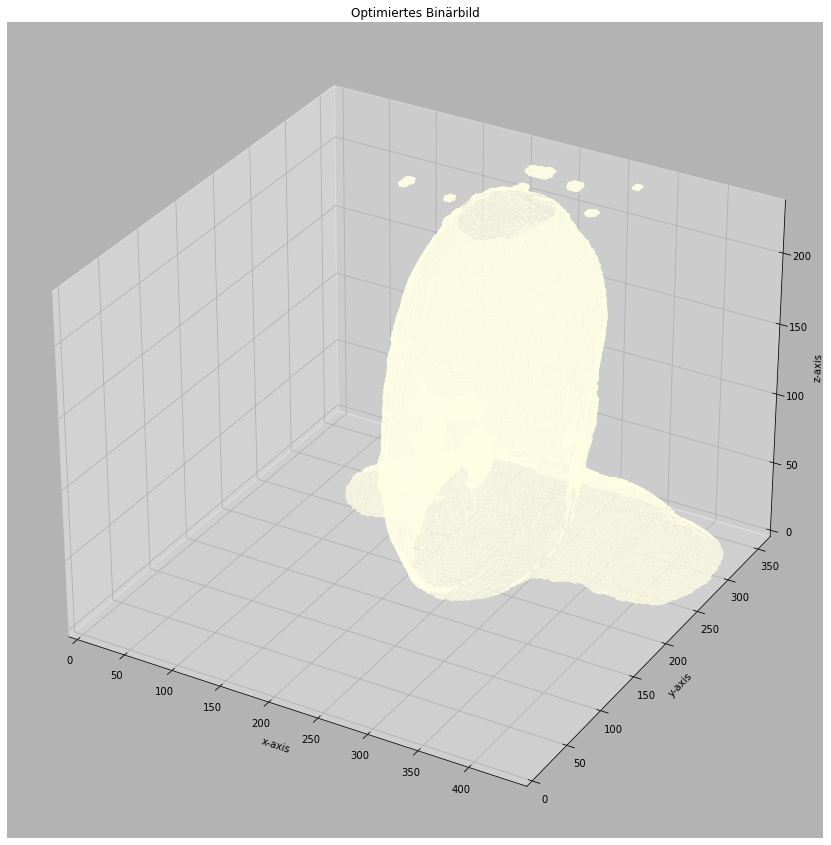

In [4]:
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def create_mesh(images):
    transposed_images = images.transpose(2,1,0)
    verts, faces, normals, values = measure.marching_cubes(volume=transposed_images,step_size=2, allow_degenerate=True)
    return verts, faces

def plt_3D(verts, faces, label):
    x,y,z = zip(*verts)
    fig = plt.figure(figsize=(15, 15))
    axis = fig.add_subplot(111, projection='3d')
    
    mesh = Poly3DCollection(verts[faces])
    mesh.set_facecolor([1, 1, 0.9])
    axis.add_collection3d(mesh)
    
    axis.set_xlabel("x-axis")
    axis.set_ylabel("y-axis")
    axis.set_zlabel("z-axis")
    axis.set_title(label)
    
    axis.set_xlim(0, max(x))
    axis.set_ylim(0, max(y))
    axis.set_zlim(0, max(z))
    axis.set_facecolor((0.7, 0.7, 0.7))
    plt.show()
    
v, f = create_mesh(np.array(opt_stack))
plt_3D(v, f, 'Optimiertes Binärbild')



### Bonusaufgaben

Folgende, zusätzliche Funktionen sind für das Erreichen der Bonuspunkte möglich:

- Weitere Optimierungen der Binärbilder in **3.** (externe Frameworks dürfen verwendet werden).
- Je nach verwendeter Visualisierung in **4.** könnte die Rotation des 3D-Modells um die Achsen interaktiv festgelegt werden. Möglich wären z.B. jeweils ein Slider für x-, y- und z-Achse.

Weitere Bonus-Funktionen sind nach Rücksprache ebenfalls möglich.

Für die Realisierung der Bonus-Funktion nutzen Sie bitte zusätzliche Notebook-Zellen unterhalb dieser Erläuterung, so dass die Bonus-Funktionen keine Randeffekte im *Pflichtteil* hervorrufen. Kopieren Sie hierzu, falls nötig, benötigte Teile Ihrer bisherigen Lösungen bover Sie Veränderungen vornehmen.

Stellen Sie Ihrer Bonus-Implementierung eine **kurze** Erläuterung der umgesetzten Funktion(en) voraus.

Für das Erreichen der Bonuspunkte genügt die Umsetzung **einer** der genannten bzw. selbst ausgewählten Funktionalitäten!

In [ ]:
from plotly import __version__
import plotly.figure_factory as FF
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)


def plotly_3d(verts, faces):
    x,y,z = zip(*verts)
    print("Interaktives Modell wird gezeichnet...")
    
    colormap=['rgb(236, 236, 212)','rgb(236, 236, 212)']
    
    fig = FF.create_trisurf(x=x,
                        y=y, 
                        z=z, 
                        plot_edges=False,
                        colormap=colormap,
                        simplices=faces,
                        backgroundcolor='rgb(64, 64, 64)',
                        title="Interaktive 3D-Visualisierung")
    iplot(fig)
    

v, f = create_mesh(np.array(opt_stack))
plotly_3d(v, f)